A intenção desse notebook é fazer uma análise exploratória dos dados fornecidos pelo Airbnb e tentar prever os valores de aluguéis das acomodações.

Iremos fazer essa análise para a cidade do Rio de Janeiro e os dados podem ser obtidos nesse [site](http://insideairbnb.com/get-the-data.html).

O arquivo a ser utilizado é o `listings.csv` da cidade escolhida.


- # Data Collect

In [13]:
# importar os pacotes necessarios
import pandas as pd

In [26]:
# lendo o dataframe
df = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-02-22/visualisations/listings.csv')

In [15]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [16]:
# Listando os primeiros cinco registros.
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,221,5,260,2021-02-08,2.01,1,304
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98570,-43.20193,Entire home/apt,307,3,85,2018-02-14,0.67,1,10
2,25026,Beautiful Modern Decorated Studio in Copa,3746246,Ghizlane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.82,11,328
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,273,2,181,2020-03-15,2.02,1,207
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,135,3,353,2021-02-10,2.79,1,101


## Dicionário de dados.

* `id` - Chave aleatória gerada como identificador do imóvel.
* `name` - Nome do imóvel cadastrado na plataforma.
* `host_id` - Código de identificação do anfitrião do imóvel.
* `host_name` - Nome do anfitrião.
* `neighbourhood_group` - Regiões dos bairros.
* `neighbourhood` - Nome do Bairro.
* `latitude` - Latitude do imóvel.
* `longitude` - Longitude do imóvel.
* `room_type` - Tipo de quarto oferecido (Private room | Entire home/apt | Hotel room | Shared Room)
* `price` - Preço da diária do imóvel
* `minimum_nights` - Mínimo de diárias para conseguir reservar.
* `number_of_reviews` - Número total de avaliações que o imóvel possui.
* `last_review` - Data da última availiação.
* `reviews_per_month` - Quantidade de avaliações mensais
* `calculated_host_listings_count` - Quantidade de imóveis que um mesmo anfitrião possui na plataforma.
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias


In [17]:
# Listando os últimos cinco registros.
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
26610,48269503,Quarto inteiro no Recreio dos Bandeirantes.,389246322,Vivian,NaN,Recreio dos Bandeirantes,-23.01452,-43.46005,Private room,94,1,0,NaN,NaN,4,180
26611,48269534,"Casa grande mobiliada, 2 quartos em Jacarepaguá.",122122028,Victor,NaN,Cidade de Deus,-22.95078,-43.35997,Entire home/apt,141,1,0,NaN,NaN,1,365
26612,48270411,BR-RJ020 Casa Niemeyer vista deslumbrante,13773093,Raphael,NaN,São Conrado,-22.99825,-43.25133,Entire home/apt,2500,3,0,NaN,NaN,1,360
26613,48270514,Casa Tijuca - Curtir e aproveitar o Rio,23737846,Lucas,NaN,Tijuca,-22.92816,-43.24319,Entire home/apt,160,5,0,NaN,NaN,3,269
26614,48276004,Rio Spot Homes D040,13580277,Marcio,NaN,Copacabana,-22.96482,-43.17428,Entire home/apt,316,1,0,NaN,NaN,59,159


In [18]:
# listando as informações da base.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26615 entries, 0 to 26614
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26615 non-null  int64  
 1   name                            26586 non-null  object 
 2   host_id                         26615 non-null  int64  
 3   host_name                       26591 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   26615 non-null  object 
 6   latitude                        26615 non-null  float64
 7   longitude                       26615 non-null  float64
 8   room_type                       26615 non-null  object 
 9   price                           26615 non-null  int64  
 10  minimum_nights                  26615 non-null  int64  
 11  number_of_reviews               26615 non-null  int64  
 12  last_review                     

Como podemos observar, a coluna *neighbourhood_group* não possui nenhum registro.
E algumas outras colunas, apresentam valores **NaN**.

In [27]:
# Contando os valores nulos da base
df.isnull().sum().sort_values(ascending=False)

neighbourhood_group               26615
last_review                        9958
reviews_per_month                  9958
name                                 29
host_name                            24
id                                    0
host_id                               0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [20]:
# Dropando a coluna 'neighbourhood_group'
df.drop(columns='neighbourhood_group', inplace = True)

In [9]:
df.shape

(26615, 15)

In [10]:
# Buscando os valores nulos do Name.

df[df['name'].isnull()].head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1479,2221003,NaN,2232688,Tatiana,São Conrado,-22.99306,-43.25520,Entire home/apt,5455,1,0,NaN,NaN,1,365
2208,2692189,NaN,4426879,NaN,Maracanã,-22.91268,-43.21945,Entire home/apt,4091,1,0,NaN,NaN,2,365
2617,2930312,NaN,14963811,Marlon,Rio Comprido,-22.92466,-43.21115,Entire home/apt,1000,1,0,NaN,NaN,1,365
2804,3042602,NaN,15396642,Vera,Santa Teresa,-22.91503,-43.18333,Entire home/apt,2182,1,0,NaN,NaN,1,365
2806,3042838,NaN,15493868,Jorge,Centro,-22.91105,-43.19446,Entire home/apt,1200,1,0,NaN,NaN,1,365


In [23]:
# Preenchendo a coluna reviews_per_month por 0 nos casos em que é NaN
df['reviews_per_month'].fillna(0, inplace = True)

In [24]:
# Preenchendo a coluna reviews_per_month por 0 nos casos em que é NaN
df['last_review'].fillna(0, inplace = True)

In [ ]:
# Preenchendo as colunas name e host_name por Desconhecido
df['name'].fillna('Desconhecido', inplace = True)
df['host_name'].fillna('Desconhecido', inplace = True)

In [ ]:
df.shape

(26615, 14)

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,Copacabana,-22.96592,-43.17896,Entire home/apt,221,5,260,2.01,1,304
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,Ipanema,-22.98570,-43.20193,Entire home/apt,307,3,85,0.67,1,10
2,25026,Beautiful Modern Decorated Studio in Copa,3746246,Ghizlane,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,1.82,11,328
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,Ipanema,-22.98816,-43.19359,Entire home/apt,273,2,181,2.02,1,207
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,Copacabana,-22.98127,-43.19046,Entire home/apt,135,3,353,2.79,1,101


In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.661500e+04,2.661500e+04,26615.000000,26615.000000,26615.000000,26615.000000,26615.000000,26615.000000,26615.000000,26615.000000
mean,2.526448e+07,1.006657e+08,-22.965837,-43.248533,742.589254,4.725268,12.146308,0.393779,9.665414,219.438174
std,1.573416e+07,1.090670e+08,0.034971,0.096296,5368.868834,19.102522,29.722813,0.756984,35.942124,141.525405
min,1.787800e+04,3.607000e+03,-23.072920,-43.704790,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.220219e+07,1.431500e+07,-22.984570,-43.304090,157.000000,1.000000,0.000000,0.000000,1.000000,88.000000
50%,2.374090e+07,6.026326e+07,-22.971700,-43.196210,280.000000,2.000000,2.000000,0.080000,1.000000,254.000000
75%,4.089613e+07,1.546962e+08,-22.951575,-43.186300,550.000000,4.000000,9.000000,0.440000,3.000000,363.000000
max,4.827600e+07,3.892463e+08,-22.749820,-43.104860,625216.000000,1000.000000,446.000000,29.530000,295.000000,365.000000


## Distribuição

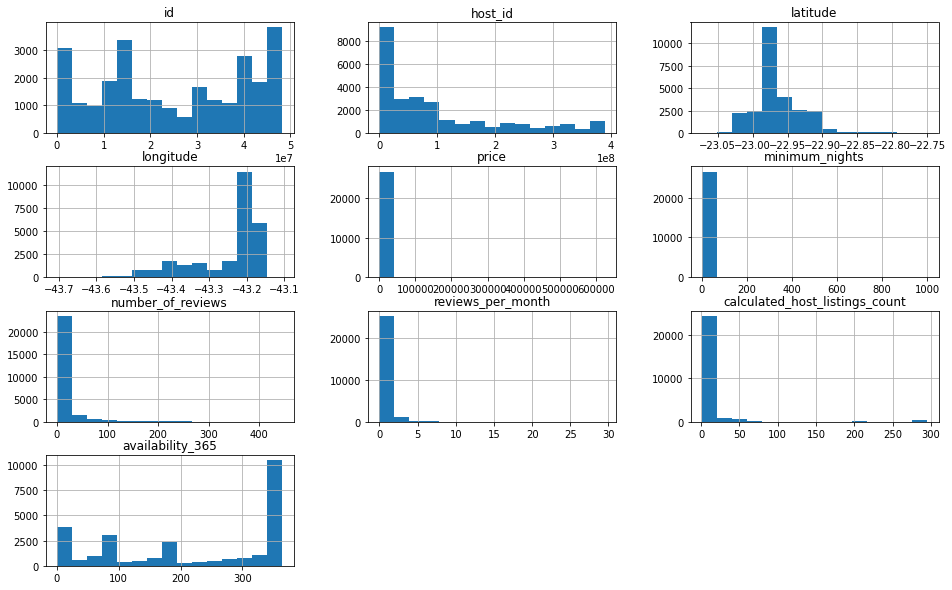

In [ ]:
df.hist(bins = 15, figsize=(16,10));

In [ ]:
# Verificando os imóveis com número de noites maior do que 10.
df[df['price'] > 150000]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
8311,13879989,Temporary rentals for Brazilian Cup.,82046629,Elizabeth,São Cristóvão,-22.90156,-43.22977,Shared room,625216,6,0,0.0,1,365
